## microonde

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("D:/Progetti/LabProgram")
import lab_utilities as lu
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import os

In [2]:
lu.setDefaultGraphStyle(size=(13,8))

### Onde stazionarie

In [20]:
#constants
delta_emitter = 12.2e-2
delta_receiver = 16.3e-2
err_deltas = 0.05e-2
sigma_d = 0.05e-2

### Dipendenza da r

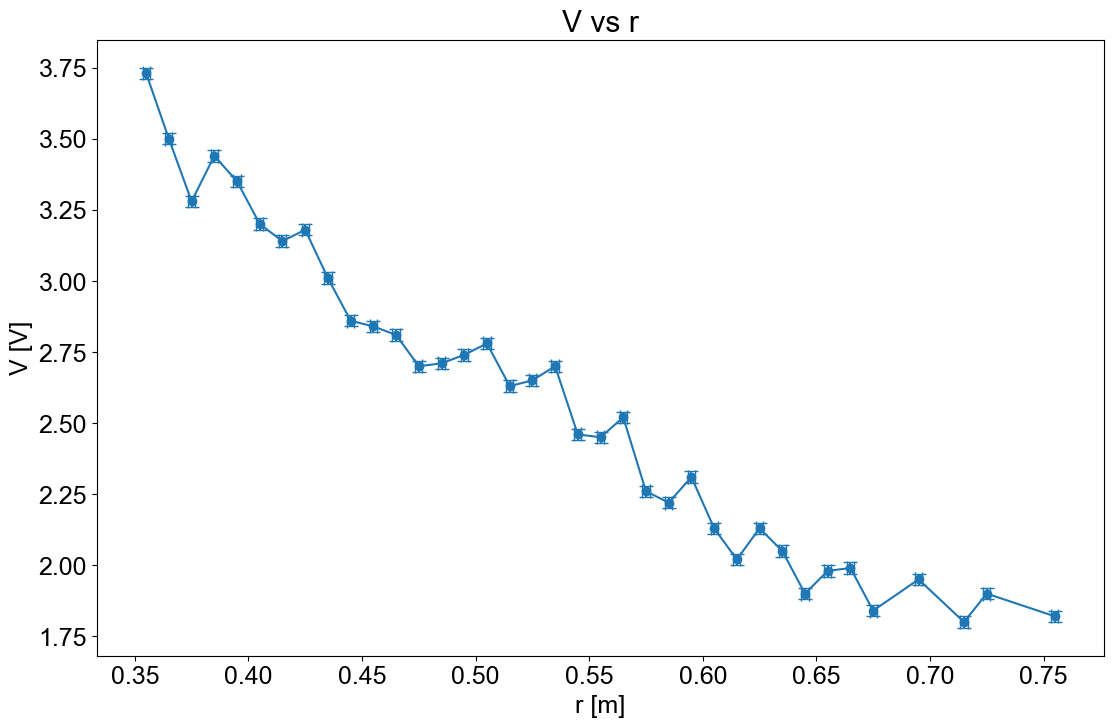

In [31]:
#load data
data = pd.read_csv("data/onde_stazionarie/ondestazionarie_r.csv")
#calculate r
ls_r = data["ls"] #in cm
lr_r = data["lr"] #in cm
ls_r = lu.lmultiply(ls_r, 1e-2) #in m
lr_r = lu.lmultiply(lr_r, 1e-2) #in m
err_l = 0.1e-2
rs = [lr - ls - delta_emitter - delta_receiver for ls, lr in zip(ls_r, lr_r)]
rs_err = [np.sqrt(err_l**2 + err_l**2 + err_deltas**2 + err_deltas**2) for i in range(len(rs))]
#save data (rs, rs_err, V, err_V)
data_elab = pd.DataFrame({"r": rs, "err_r": rs_err, "V": data["V"], "err_V": data["err_V"]})
data_elab.to_csv("data/onde_stazionarie/ondestazionarie_r_elab.csv", index=False)

#plot "V" (in data), vs r [with error]
plt.errorbar(rs, data["V"], xerr=rs_err, yerr=data["err_V"], fmt="-o", label="data")
plt.xlabel("r [m]")
plt.ylabel("V [V]")
plt.title("V vs r")
plt.show()

1/r^2 fit:
a = 0.30723960005981815 +- 0.0019308096184010545
b = 1.352003523330559 +- 0.008313495702374976
covariance = -1.4743017933472213e-05

1/r fit:
a = 1.271172739267328 +- 0.007911947995144582
b = 0.09494893698748597 +- 0.015733926805186073
covariance = -0.00012173751220381775


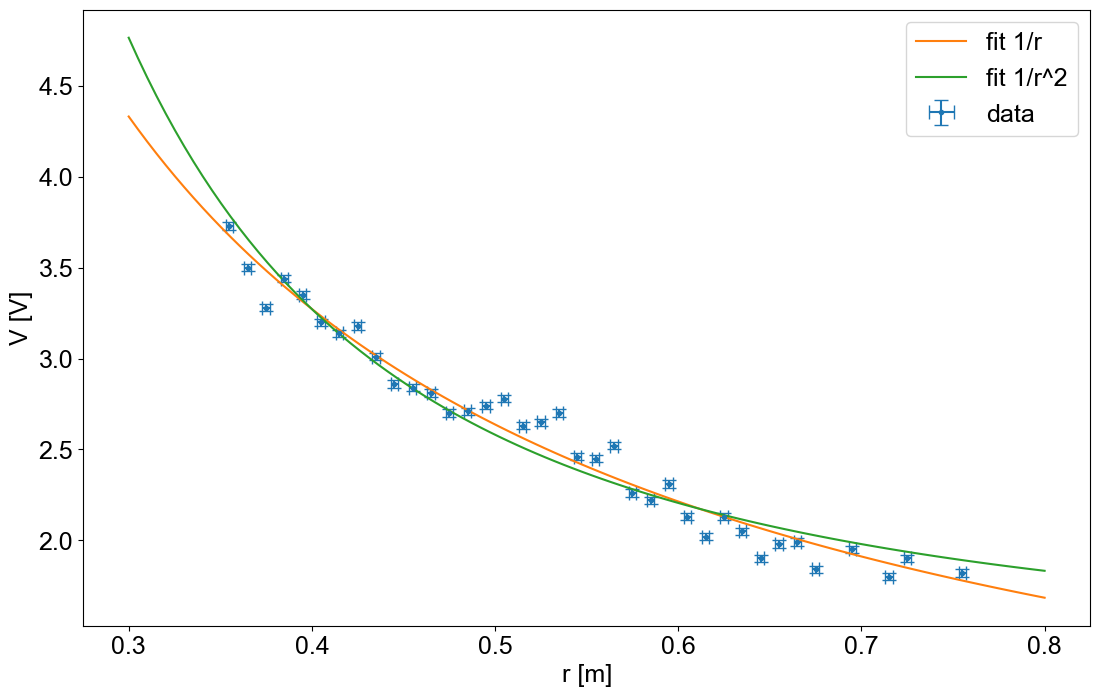

In [20]:
#try to fit with 1/r^2
def fit_func_2(x, a, b):
    return a/x**2 + b

#also try to fit with 1/r
def fit_func(x, a, b):
    return a/x + b

#usce scipy.optimize.curve_fit
popt_2, pcov_2 = curve_fit(fit_func_2, rs, data["V"], sigma=data["err_V"], absolute_sigma=True)
print("1/r^2 fit:")
print("a = {} +- {}".format(popt_2[0], np.sqrt(pcov_2[0,0])))
print("b = {} +- {}".format(popt_2[1], np.sqrt(pcov_2[1,1])))
print("covariance = {}".format(pcov_2[0,1]))
print()

popt, pcov = curve_fit(fit_func, rs, data["V"], sigma=data["err_V"], absolute_sigma=True)
print("1/r fit:")
print("a = {} +- {}".format(popt[0], np.sqrt(pcov[0,0])))
print("b = {} +- {}".format(popt[1], np.sqrt(pcov[1,1])))
print("covariance = {}".format(pcov[0,1]))

#plot fit and data
plt.errorbar(rs, data["V"], xerr=rs_err, yerr=data["err_V"], fmt=".", label="data")
x = np.linspace(0.3, 0.8, 100)
x_2 = np.linspace(0.3, 0.8, 100)
plt.plot(x, fit_func(x, *popt), label="fit 1/r")
plt.plot(x_2, fit_func_2(x_2, *popt_2), label="fit 1/r^2")
plt.xlabel("r [m]")
plt.ylabel("V [V]")
plt.legend()
plt.show()


#### Massimi

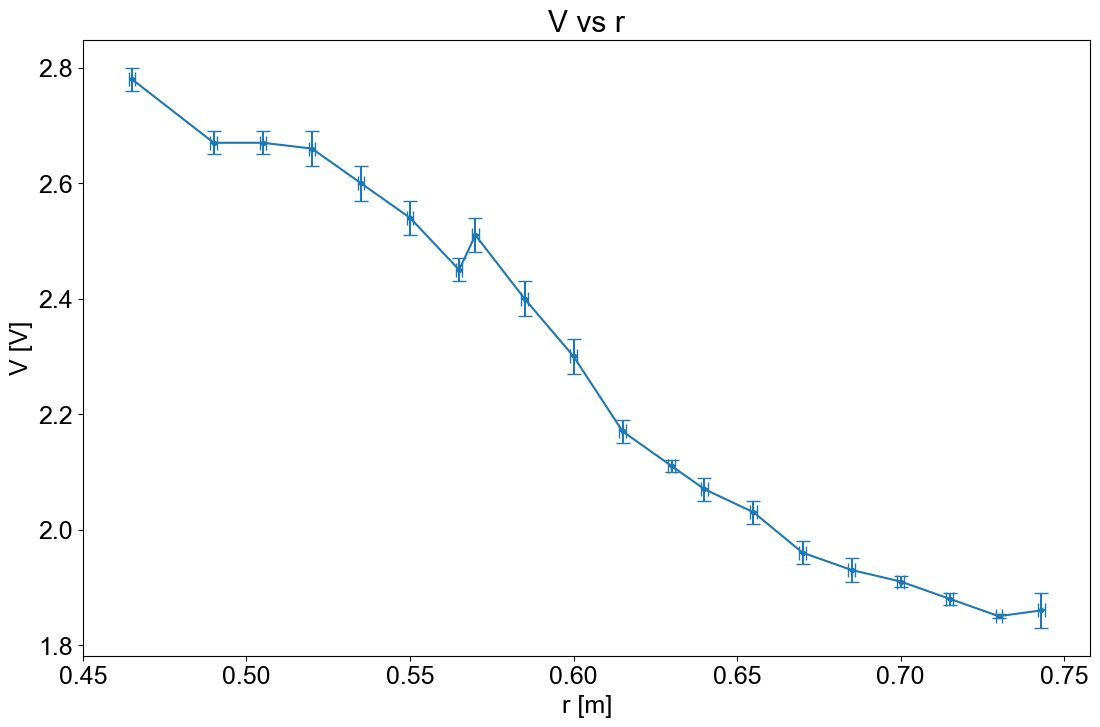

In [63]:
data_max = pd.read_csv("data/onde_stazionarie/ondestazionarie_r_massimi.csv")
#calculate r
ls_max = data_max["ls"] #in cm
lr_max = data_max["lr"] #in cm
ls_max = lu.lmultiply(ls_max, 1e-2) #in m
lr_max = lu.lmultiply(lr_max, 1e-2) #in m
V_max = data_max["V"]
err_V_max = data_max["err_V"]
#order data
ls_max, lr_max, V_max, err_V_max = zip(*sorted(zip(ls_max, lr_max, V_max, err_V_max)))
#remove first 7 points
ls_max = ls_max[0:]
lr_max = lr_max[0:]
V_max = V_max[0:]
err_V_max = err_V_max[0:]

err_l = 0.1e-2
rs_max = [lr - ls - delta_emitter - delta_receiver for ls, lr in zip(ls_max, lr_max)]
rs_max_err = [2*sigma_d for i in range(len(rs_max))]
#save rs_max, rs_max_err, V_max, err_V_max
#elab_data = pd.DataFrame({"rs_max": rs_max, "rs_max_err": rs_max_err, "V_max": V_max, "V_max_err": err_V_max})
#elab_data.to_csv("data/onde_stazionarie/ondestazionarie_r_massimi_elab.csv", index=False) 
#plot "V" (in data), vs r [with error]
plt.errorbar(rs_max, V_max, xerr=rs_max_err, yerr=err_V_max, fmt=".-", label="data")
plt.xlabel("r [m]")
plt.ylabel("V [V]")
plt.title("V vs r")
plt.show()

In [64]:
#find wavelength
#distance between two maxima
distances = []
distances_err = []
for i in range(len(rs_max)-1):
    distances.append(rs_max[i+1] - rs_max[i])
    distances_err.append(np.sqrt(rs_max_err[i+1]**2 + rs_max_err[i]**2))
#mean distance
mean_distance = np.mean(distances)
wavelenght = abs(2*mean_distance)
#convert to cm
wavelenght = wavelenght*100
print("wavelenght = {}".format(wavelenght))


wavelenght = 2.9263157894736844


#### Lunghezza d'onda

Si può calcolare dal fatto che tra due massimi c'è una distanza $\lambda/2$, quindi $2d_m = \lambda$

In [65]:
#find wavelength
#distance between two maxima
distances = []
distances_err = []
for i in range(len(rs_max)-1):
    distances.append(rs_max[i+1] - rs_max[i])
    distances_err.append(np.sqrt(rs_max_err[i+1]**2 + rs_max_err[i]**2))

#weighted mean distance
mean_distance = np.average(distances, weights=1/np.array(distances_err)**2)
wavelenght = abs(2*mean_distance)
wavelenght_error = 2*np.sqrt(2) * sigma_d
wavelenghts_std = np.std(lu.lmultiply(distances, 2))

print("wavelenght = {} +- {}".format(wavelenght, wavelenght_error))
print("wavelenght std = {}".format(wavelenghts_std))

wavelenght = 0.02926315789473684 +- 0.0014142135623730952
wavelenght std = 0.006904171929181764


In [66]:
print(len(distances))

19


### Dipendenza da $\theta$

In [4]:
ls = 20e-2
lr = 77e-2
r_const = lr - ls - delta_emitter - delta_receiver
print("r_const = ", r_const)

r_const =  0.28500000000000003


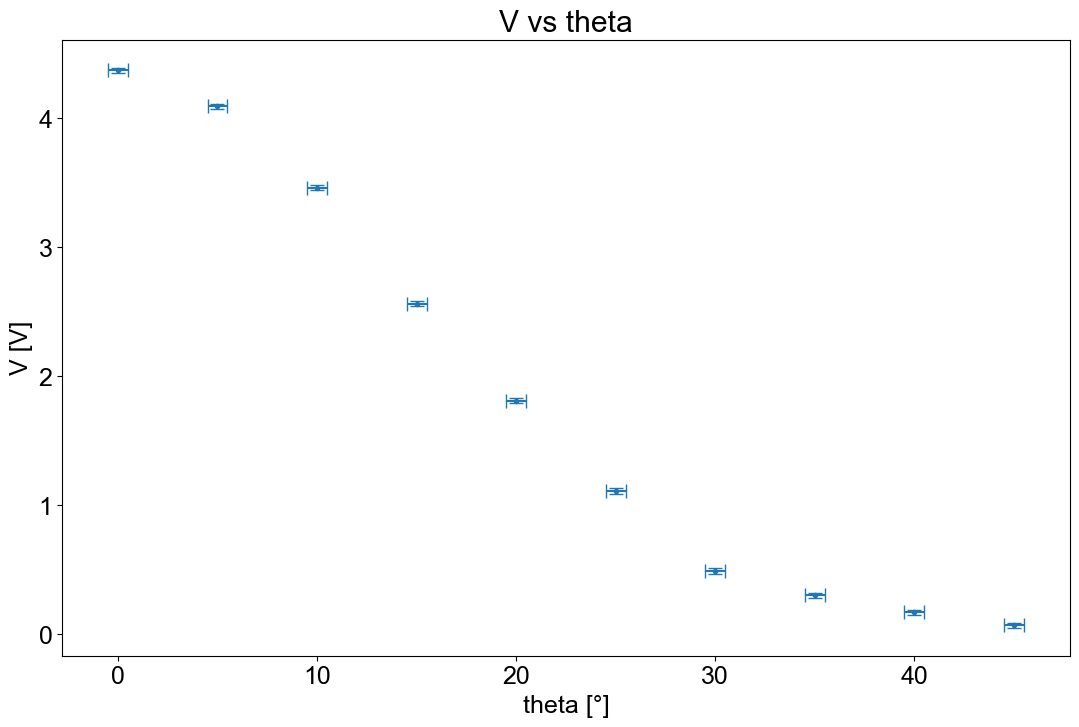

In [15]:
data_t = pd.read_csv("data/onde_stazionarie/ondestazionarie_theta.csv")

err_theta = 0.5
#plot "V" (in data), vs theta [with error]
plt.errorbar(data_t["theta"], data_t["V"], xerr=[err_theta for i in range(len(data_t["theta"]))], yerr=data_t["err_V"], fmt=".")
plt.xlabel("theta [°]")
plt.ylabel("V [V]")
plt.title("V vs theta")
plt.show()

In [16]:
print(data_t.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 theta &    V &  err\_V \\
\midrule
     0 & 4.37 &   0.02 \\
     5 & 4.09 &   0.02 \\
    10 & 3.46 &   0.02 \\
    15 & 2.56 &   0.02 \\
    20 & 1.81 &   0.02 \\
    25 & 1.11 &   0.02 \\
    30 & 0.49 &   0.02 \\
    35 & 0.30 &   0.02 \\
    40 & 0.17 &   0.02 \\
    45 & 0.07 &   0.02 \\
\bottomrule
\end{tabular}



C:\Users\giova\AppData\Local\Temp\ipykernel_12724\2347862607.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data_t.to_latex(index=False))


## Polarizzazione

In [ ]:
r_p = 36.5e-2

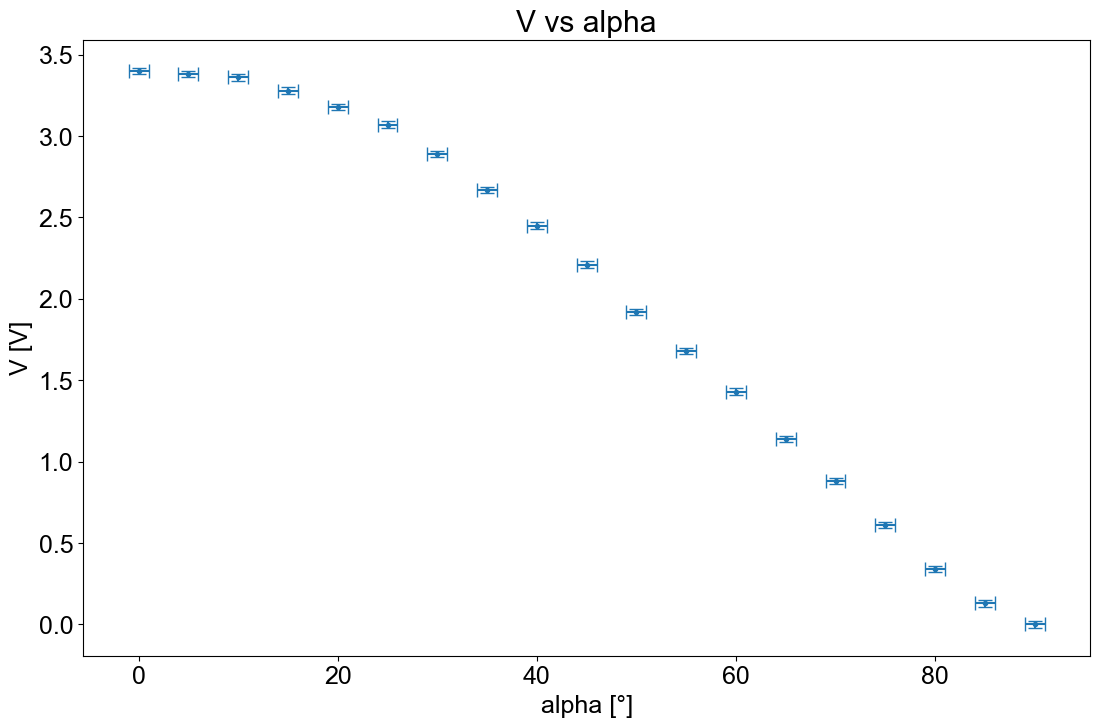

In [45]:
data_p = pd.read_csv("data/polarizzazione/polarizzazione_alpha.csv")
data_p.head()
#plot V vs alpha
plt.errorbar(data_p["alpha"], data_p["V"], xerr=1, yerr=data_p["err_V"], fmt=".")
plt.xlabel("alpha [°]")
plt.ylabel("V [V]")
plt.title("V vs alpha")
plt.show()

## Riflessione

### Legge di snell

Text(0.5, 1.0, 'angolo riflessione vs angolo incidenza')

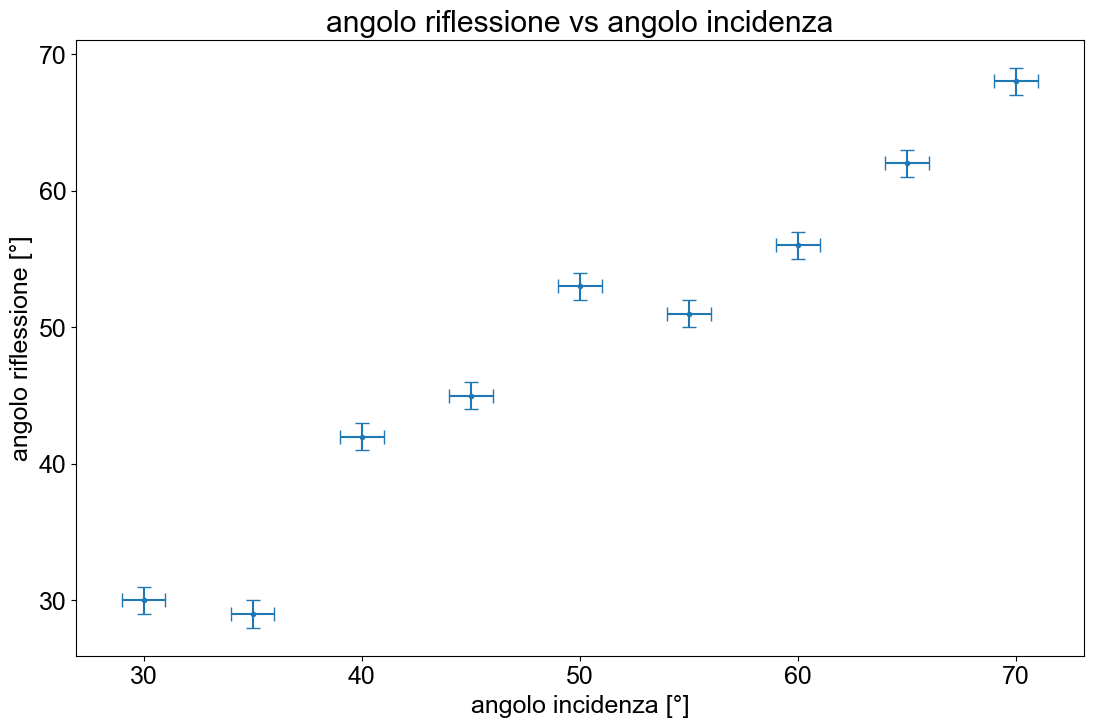

In [54]:
data_rfiless = pd.read_csv("data/riflessione/riflessione.csv")
theta_in = 90 - data_rfiless["theta_l"]
theta_ri = 270 - data_rfiless["theta_r"] + data_rfiless["theta_l"]
#save theta_in, theta_ri
#elab_data = pd.DataFrame({"theta_in": theta_in, "theta_ri": theta_ri})
#elab_data.to_csv("data/riflessione/riflessione_elab.csv", index=False)
#plot theta_i vs theta_r
plt.errorbar(theta_in, theta_ri, xerr=1, yerr=1, fmt=".")
plt.xlabel("angolo incidenza [°]")
plt.ylabel("angolo riflessione [°]")
plt.title("angolo riflessione vs angolo incidenza")

## Rifrazione

In [14]:
#Misura con prisma vuoto $\longrightarrow$ $\theta = 0$
#Misura con styrene $\longrightarrow$ $\theta = 9°$
theta = 20
#index of refraction styrene
n_sty = np.sin(np.radians(29))/np.sin(np.radians(theta))
print("n_sty = ", n_sty)

# error calculation
sigma_theta_r = 0.5  # example value for sigma_theta_r
sigma_theta_i = 0.5  # example value for sigma_theta_i

theta_i = 20
theta_r = 29

sigma_ns_2 = (
    (np.cos(np.radians(theta_r)) / np.sin(np.radians(theta_i)) * sigma_theta_r) ** 2 +
    ((-np.sin(np.radians(theta_r)) * np.cos(np.radians(theta_i)) * sigma_theta_i) / np.sin(np.radians(theta_i))**2) ** 2
)
sigma_ns = np.sqrt(sigma_ns_2)
print("sigma_ns =", sigma_ns)

n_sty =  1.4174885009176357
sigma_ns = 2.329518525119345


## Brewster

In [4]:
import os

20.0
25.0
35.0


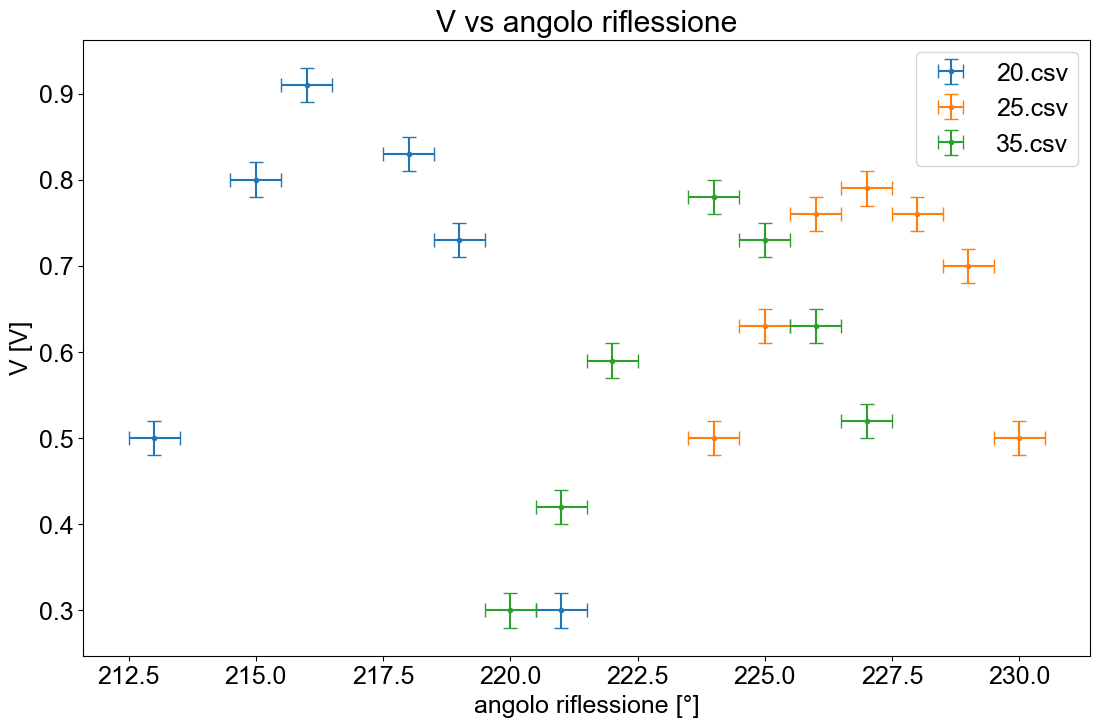

In [66]:
#in data/brewster are csv files with data for each angle of incidence

#load data, use os to get all files in data/brewster
for file in os.listdir("data/brewster"):
    data_b = pd.read_csv("data/brewster/" + file)
    #plot theta_i vs theta_r
    incidence_angle = float(file.split(".")[0])
    print(incidence_angle)
    theta_ri_b = 270 - data_b["theta_r"] + incidence_angle
    plt.errorbar(data_b["theta_r"], data_b["V"], xerr=0.5, yerr=data_b["err_V"], fmt=".", label=file)
    plt.xlabel("angolo riflessione [°]")
    plt.ylabel("V [V]")

plt.title("V vs angolo riflessione")
plt.legend()
plt.show()

In [6]:
#find max of parabola by interpolating
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

In [101]:
maxes = []
maxes_err = []
for file in os.listdir("data/brewster/riflessione"):
    data_b = pd.read_csv("data/brewster/riflessione/" + file)
    incidence_angle = float(file.split(".")[0])
    theta_ri_b = 270 - data_b["theta_r"] + incidence_angle
    #fit parabola
    popt, pcov = curve_fit(parabola, theta_ri_b, data_b["V"])
    print("incidence angle = ", incidence_angle)
    max_angle = -popt[1]/(2*popt[0])
    maxes.append(max_angle)
    D = np.array([popt[1]/(2*popt[0]**2), -1/(2*popt[0]),0])
    max_err = np.sqrt(np.transpose(D) @ pcov @ D)
    maxes_err.append(max_err)
    print("error = ", max_err, "°")
    #print params
    print()

incidence angle =  20.0
error =  0.02055186926677327 °

incidence angle =  30.0
error =  0.030061888241046313 °

incidence angle =  40.0
error =  0.17936210626449822 °

incidence angle =  50.0
error =  0.22023967662670316 °

incidence angle =  55.0
error =  0.1327512736740539 °

incidence angle =  60.0
error =  0.15038603884786023 °



Text(0, 0.5, 'angolo riflessione [°]')

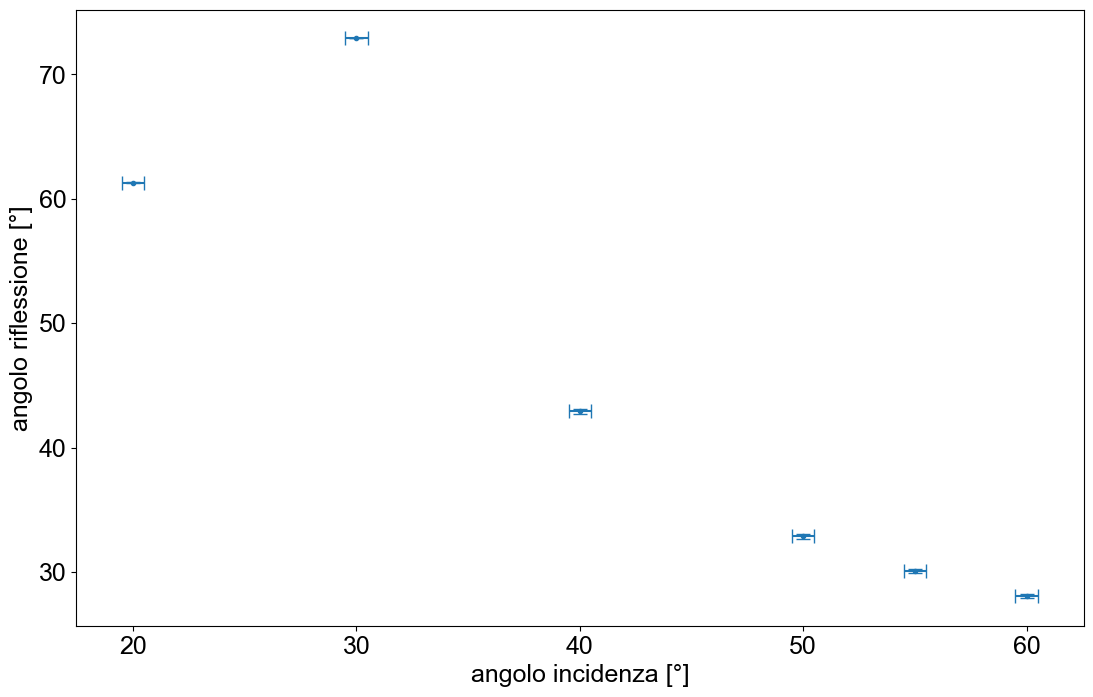

In [97]:
#plot maxs vs incidence angle
#plot with error
plt.errorbar([float(file.split(".")[0]) for file in os.listdir("data/brewster")], maxes, xerr=0.5, yerr=maxes_err, fmt=".")
plt.xlabel("angolo incidenza [°]")
plt.ylabel("angolo riflessione [°]")

#### con trasmissione

max_1.csv
max angle =  55.18442769675124 +/- 0.26930549080774063 °

max_2.csv
max angle =  51.78774191606293 +/- 0.17579137173418988 °



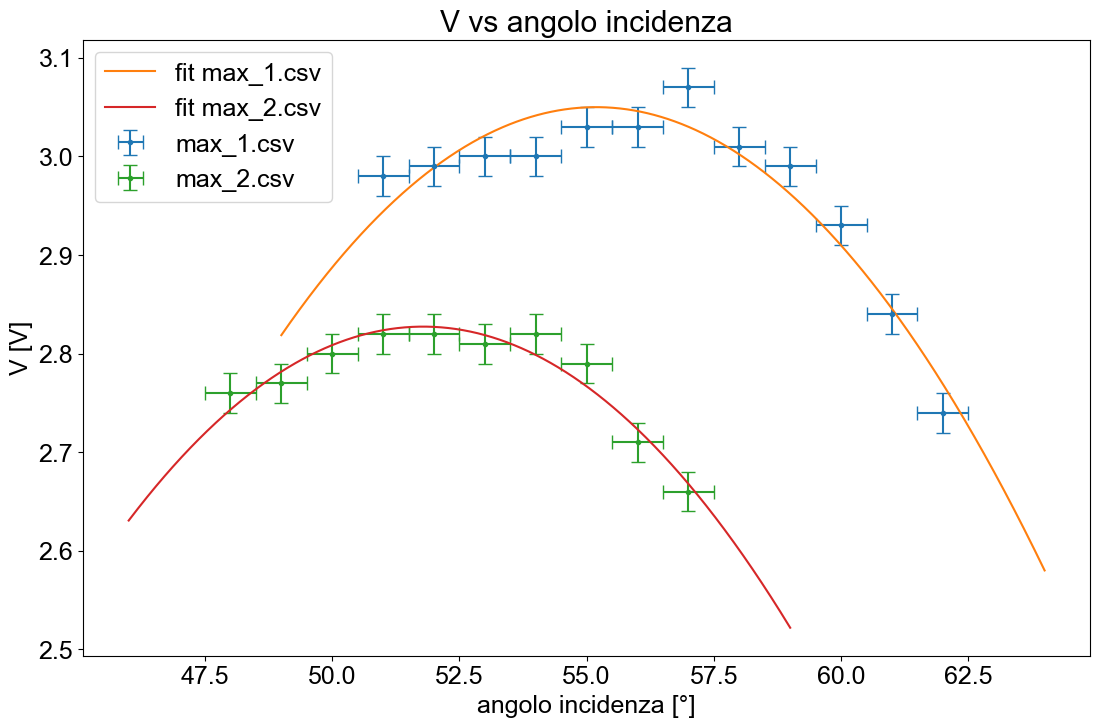

In [8]:
maxes_t = []
maxes_err_t = []
f_names = []

#set up plot
fig, ax = plt.subplots()

for file in os.listdir("data/brewster/trasmissione"):
    print(file)
    data_b = pd.read_csv("data/brewster/trasmissione/" + file)
    f_names.append(file)
    if(file == "max_1.csv"):
        incidence_angle = [360-  theta_e for theta_e in data_b["theta_e"]]
    #fit parabola
    else:
        incidence_angle = [theta_e for theta_e in data_b["theta_e"]]
    popt, pcov = curve_fit(parabola, incidence_angle, data_b["V"])
    max_angle = -popt[1]/(2*popt[0])
    maxes_t.append(max_angle)
    D = np.array([popt[1]/(2*popt[0]**2), -1/(2*popt[0]),0])
    max_err = np.sqrt(np.transpose(D) @ pcov @ D)
    maxes_err_t.append(max_err)
    print("max angle = ", max_angle , "+/-", max_err, "°")
    #print params
    print()

    #plot data and fit for each file in the same plot
    ax.errorbar(incidence_angle, data_b["V"], xerr=0.5, yerr=data_b["err_V"], fmt=".", label=file)
    linspace = np.linspace(min(incidence_angle)-2, max(incidence_angle)+2, 1000)
    ax.plot(linspace, parabola(linspace, *popt), label="fit " + file)

    #elab_data = pd.DataFrame({"theta_e": incidence_angle, "V": data_b["V"], "err_V": data_b["err_V"]})
    #elab_data.to_csv("data/brewster/trasmissione/" + file[:-4] + "_elab" + ".csv", index=False)
    #axes labels
    ax.set_xlabel("angolo incidenza [°]")
    ax.set_ylabel("V [V]")
    ax.set_title("V vs angolo incidenza")
    ax.legend()


In [10]:
#print covariance matrix
print("covariance matrix = ")
print(pcov)

covariance matrix = 
[[ 5.05500604e-07 -5.30775623e-05  1.38911562e-03]
 [-5.30775623e-05  5.57637914e-03 -1.46026985e-01]
 [ 1.38911562e-03 -1.46026985e-01  3.82623334e+00]]


In [77]:
brewster_angle = (maxes_t[0] + maxes_t[1])/2
brewster_angle_err = np.sqrt(maxes_err_t[0]**2 + maxes_err_t[1]**2) / 2
print("brewster angle = ", brewster_angle, "+/-", brewster_angle_err, "°")

brewster angle =  53.486084806407085 +/- 0.16080116118625062 °


In [11]:
# With values from ROOT fit
theta_M1 = 55.41
theta_M2 = 51.86
theta_M1_err = 0.05
theta_M2_err = 0.08

brewster_angle = (theta_M1 + theta_M2)/2
brewster_angle_err = np.sqrt(theta_M1_err**2 + theta_M2_err**2) / 2
print("brewster angle = ", brewster_angle, "+/-", brewster_angle_err, "°")

brewster angle =  53.635 +/- 0.04716990566028302 °


# Fabry Perot

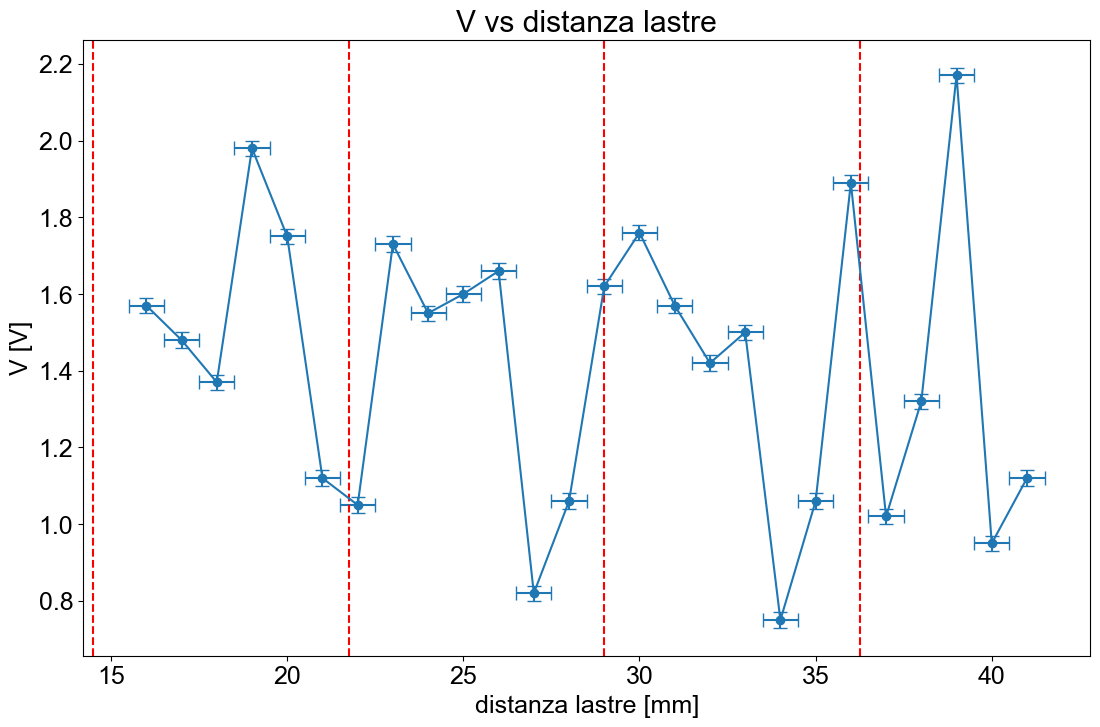

In [40]:
data_fp = pd.read_csv("data/fabry_perot/fabry_perot.csv")
#plot V vs r_lastre with errors
fp_r = data_fp["r_lastre"]
fp_V = data_fp["V"]
#reorder data by increasing r_lastre
fp_r, fp_V = zip(*sorted(zip(fp_r, fp_V)))
data_fp["r_lastre"] = fp_r
data_fp["V"] = fp_V

fig, ax = plt.subplots()

ax.errorbar(data_fp["r_lastre"], data_fp["V"], xerr=0.5, yerr=data_fp["err_V"], fmt="o-")
ax.set_xlabel("distanza lastre [mm]")
ax.set_ylabel("V [V]")
ax.set_title("V vs distanza lastre")
#add vertical lines evry 29/4 = 7.25 mm starting from 7.25 mm
for i in range(1, 5):
    ax.axvline(x=7.25 + 7.25*i, color="red", linestyle="--")


### Massimi

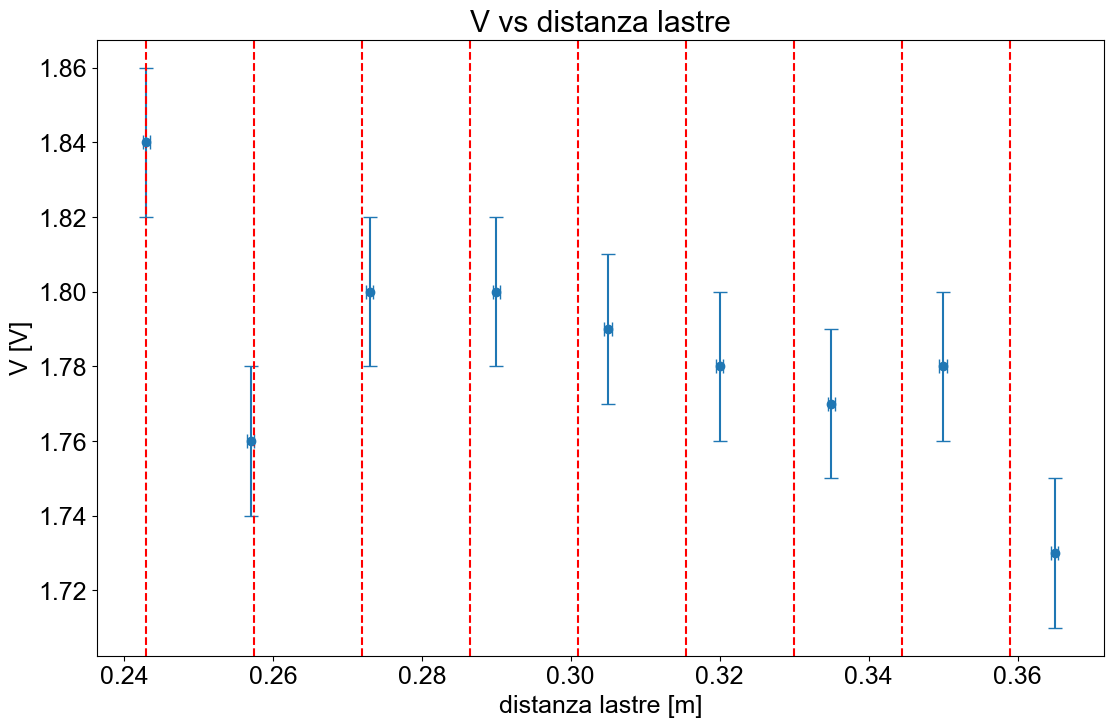

In [35]:
data_fpm = pd.read_csv("data/fabry_perot/fabry_perot_max.csv")
#plot V vs r_lastre with errors
fp_r = data_fpm["r_lastre"]
#fp_r - 45
fp_r = [(r - 45)*1e-2 for r in fp_r]
fp_V = data_fpm["V"]
#reorder data by increasing r_lastre
fp_r, fp_V = zip(*sorted(zip(fp_r, fp_V)))
data_fpm["r_lastre"] = fp_r
data_fpm["V"] = fp_V


fig, ax = plt.subplots()
ax.errorbar(data_fpm["r_lastre"], data_fpm["V"], xerr=sigma_d, yerr=data_fpm["err_V"], fmt="o")
ax.set_xlabel("distanza lastre [m]")
ax.set_ylabel("V [V]")
ax.set_title("V vs distanza lastre")

#add vertical lines evry 29/4 = 7.25 mm starting from 7.25 * 2 = 14.5

for i in range(1, 10):
    ax.axvline(x=data_fpm["r_lastre"][0] + 0.0145*(i-1), color="red", linestyle="--")

In [75]:
#printa fabry-perot data as latex table
print(data_fpm.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 r\_lastre &    V &  err\_V \\
\midrule
    0.243 & 1.84 &   0.02 \\
    0.257 & 1.76 &   0.02 \\
    0.273 & 1.80 &   0.02 \\
    0.290 & 1.80 &   0.02 \\
    0.305 & 1.79 &   0.02 \\
    0.320 & 1.78 &   0.02 \\
    0.335 & 1.77 &   0.02 \\
    0.350 & 1.78 &   0.02 \\
    0.365 & 1.73 &   0.02 \\
\bottomrule
\end{tabular}



C:\Users\giova\AppData\Local\Temp\ipykernel_39820\88878556.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data_fpm.to_latex(index=False))


In [36]:
#calculate lambda as 2*(d_{n+1} - d_n)
lambdas = []
lambdas_err = []
err_r_lastre = [sigma_d for i in range(len(data_fpm["r_lastre"]))]
for i in range(1, len(data_fpm["r_lastre"])):
    lambdas.append(2*(data_fpm["r_lastre"][i] - data_fpm["r_lastre"][i-1]))
    lambdas_err.append(2*np.sqrt(err_r_lastre[i]**2 + err_r_lastre[i-1]**2))

#weighted mean
lambdas = np.array(lambdas)
lambdas_err = np.array(lambdas_err)
lambda_mean = np.average(lambdas, weights=1/lambdas_err**2)
lambda_mean_err = 2*np.sqrt(2)*sigma_d

print("lambda = ", lambda_mean, "+/-", lambda_mean_err, "m")

lambda =  0.030500000000000006 +/- 0.0014142135623730952 m


In [67]:
print(len(lambdas))

8


##### T test Welch for the two values of lambda

In [70]:
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats

# Assume these are your known means and standard deviations
mean1 = 0.029  # mean of group 1
std1 = 0.001  # standard deviation of group 1

mean2 = 0.0305 # mean of group 2
std2 = 0.0014  # standard deviation of group 2

# Generate samples from the distributions
np.random.seed(0)  # for reproducibility
samples1 = stats.norm.rvs(loc=mean1, scale=std1, size=19*100)
samples2 = stats.norm.rvs(loc=mean2, scale=std2, size=8*100)

# Perform Welch's t-test on the samples
t_stat, p_val = ttest_ind(samples1, samples2, equal_var=False)

print(f"T statistic: {t_stat}")
print(f"P value: {p_val}")


T statistic: -28.13441325205864
P value: 2.081649606167497e-133


Text(0.5, 1.0, 'Distribuzione di lambda')

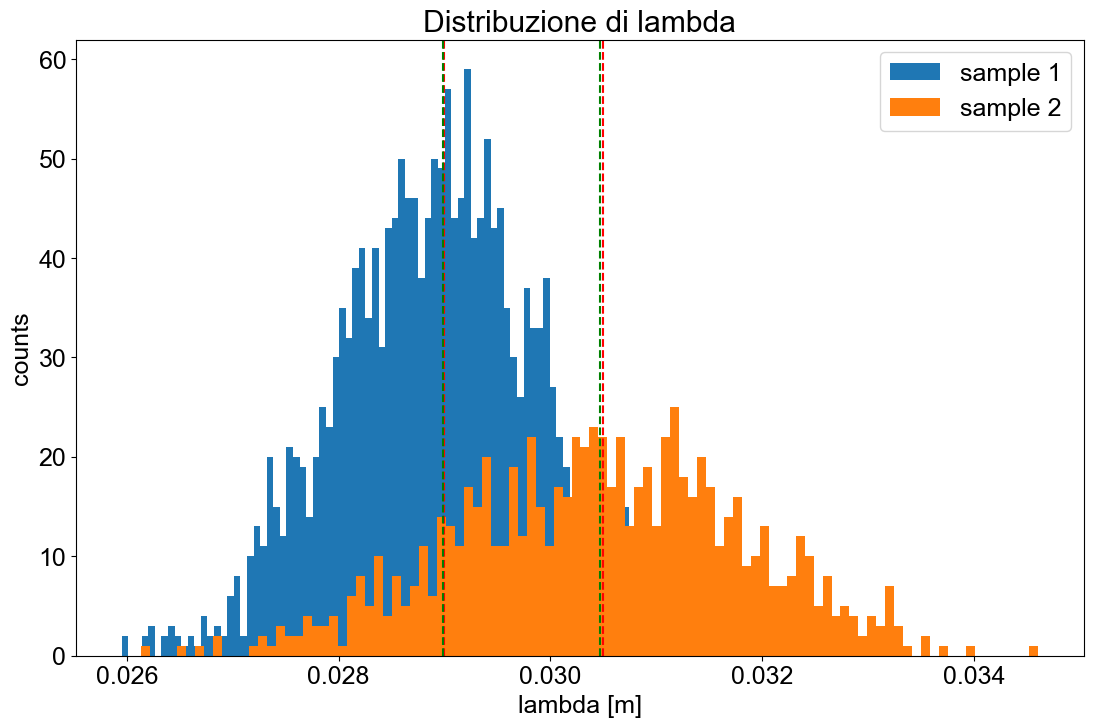

In [71]:
#plot sample distributions
fig, ax = plt.subplots()
ax.hist(samples1, bins=100, label="sample 1")
ax.hist(samples2, bins=100, label="sample 2")
#add vertical lines at means
ax.axvline(x=mean1, color="red", linestyle="--")
ax.axvline(x=mean2, color="red", linestyle="--")
#add vertical lines at meand of samples
ax.axvline(x=np.mean(samples1), color="green", linestyle="--")
ax.axvline(x=np.mean(samples2), color="green", linestyle="--")
ax.legend()
ax.set_xlabel("lambda [m]")
ax.set_ylabel("counts")
ax.set_title("Distribuzione di lambda")

In [39]:
#manualli calculate t statistic
t_stat = abs(mean1 - mean2) / np.sqrt(std1**2/len(samples1) + std2**2/len(samples2))
print("t statistic = ", t_stat)

t statistic =  27.570548328517752


In [3]:
from scipy.stats import ttest_ind_from_stats
import numpy as np

# Assume these are your known means and standard deviations
error1 = 0.001  # propagated error of group 1
mean1 = 0.029  # mean of group 1
nobs1 = 19
std1 = error1 * np.sqrt(nobs1) # standard deviation of group 1

error2 = 0.0014  # propagated error of group 2
mean2 = 0.0305 # mean of group 2
nobs2 = 8
std2 = error2 * np.sqrt(nobs2) # standard deviation of group 2

print("std1 = ", std1)
print("std2 = ", std2)

# Perform Welch's t-test
t_stat, p_val = ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=False)

print(f"T statistic: {t_stat}")
print(f"P value: {p_val}")


std1 =  0.004358898943540674
std2 =  0.003959797974644666
T statistic: -0.8718572905786434
P value: 0.397495662845171
